Libraries

In [1]:
import tensorflow as tf ; from tensorflow import keras ; import numpy as np ; import matplotlib.pyplot as plt


Loading Model

In [2]:
file = open("EmotionalFaces.json" , "r")
use = file.read()
file.close()
model = keras.models.model_from_json(use)
model.load_weights("EmotionalFaces.h5")

Labels = ["angry" , "disgusted",  "fearful" , "happy" , "neutral" , "sad" , "suprised"]

Extracting data from images

In [3]:
def Image_To_Data(images):

    img = keras.preprocessing.image.load_img(image , color_mode="grayscale")
    features = np.array(img)
    features = features.reshape(1,48,48,1)
    return features/255.0

In [19]:
image = "../Emotions_Data/test/disgusted/im100.png"
sample = Image_To_Data(image)
pred = model.predict(sample)
Standard_pred = (pred>0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Prediction

y_pred:disgusted


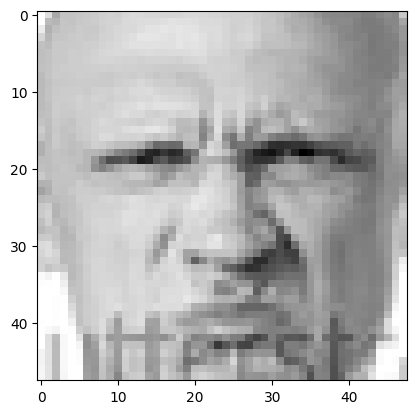

In [20]:
index_pred = []
prediction = float(max(pred[0]))

for index , i in enumerate(Standard_pred[0] , 0):
    if int(i) == 1:
        index_pred.append(str(index))
if len(index_pred)<1:
    for index , i in enumerate(pred[0] , 0):
        if float(i) == prediction:
            index_pred.append(index)

plt.imshow(sample.reshape(48,48) , cmap = "gray")
print(f"y_pred:{Labels[int(index_pred[0])]}")
